<a href="https://colab.research.google.com/github/20PW01-Abishek/until-sem7/blob/main/Ensemble%2020PW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
path = '/content/drive/MyDrive/SEM 8/DM/Copy of UNSW_NB15_training-set.csv'
import pandas as pd
df = pd.read_csv(path)
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [22]:
df.drop_duplicates(inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
  if df[col].dtype == object:
    df[col] = le.fit_transform(df[col])

df[df.columns] = df[df.columns].fillna(df[df.columns].median())
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,119,2,3,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,5,1
175337,175338,0.505762,113,0,2,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,8,1
175338,175339,0.000009,119,2,3,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,5,1
175339,175340,0.000009,119,2,3,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,5,1


Dropped Features: ['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'tcprtt', 'synack', 'ackdat', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


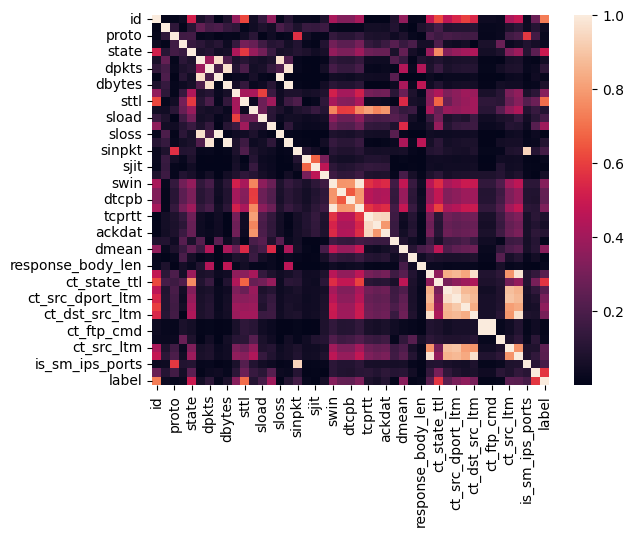

In [24]:
import numpy as np
import seaborn as sns

threshold = 0.8
corr_matrix = df.corr().abs()

sns.heatmap(corr_matrix)

upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1)

highly_correlated_mask = (corr_matrix > threshold) & upper_triangle

dropped_list = df.columns[highly_correlated_mask.any()].tolist()

df = df.drop(df.columns[highly_correlated_mask.any()], axis=1)

print("Dropped Features:", dropped_list)


In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df.drop(columns='label')
y = df['label']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print(len(y_resampled), Counter(y_resampled))
X_resampled

238682 Counter({0: 119341, 1: 119341})


,id,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,...,dtcpb,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,is_ftp_login,ct_flw_http_mthd,attack_cat
0,1,0.121478,113,0,2,6,4,74.087490,252,254,...,2202533631,43,43,0,0,1,0,0,0,6
1,2,0.649902,113,0,2,14,38,78.473372,62,252,...,3077387971,52,1106,0,0,43,1,0,0,6
2,3,1.623129,113,0,2,8,16,14.170161,62,252,...,2963114973,46,824,0,0,7,1,0,0,6
3,4,1.681642,113,3,2,12,12,13.677108,62,252,...,1047442890,52,64,0,0,1,1,1,0,6
4,5,0.449454,113,0,2,10,6,33.373826,254,252,...,1977154190,53,45,0,0,43,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238677,50130,0.978342,113,0,0,8,3,11.030163,94,252,...,3738369972,192,45,0,0,1,2,0,0,6
238678,6095,0.004310,119,0,0,4,4,1623.966903,31,29,...,0,142,76,0,0,11,0,0,0,6
238679,39673,1.212589,113,5,2,13,19,26.360124,31,29,...,2661203610,157,542,0,3745,2,0,0,0,6
238680,89992,1.090159,113,4,2,58,19,72.960117,225,223,...,2923820965,996,47,0,0,2,0,0,0,6


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X_resampled)
X_rescaled

array([[-1.42973903, -0.19144451,  0.15743357, ..., -0.10222752,
        -0.17541443,  0.66605869],
       [-1.42971955, -0.1041117 ,  0.15743357, ..., -0.10222752,
        -0.17541443,  0.66605869],
       [-1.42970006,  0.05673384,  0.15743357, ..., -0.10222752,
        -0.17541443,  0.66605869],
       ...,
       [-0.65675925, -0.01111625,  0.15743357, ..., -0.10222752,
        -0.17541443,  0.66605869],
       [ 0.32366951, -0.03135028,  0.15743357, ..., -0.10222752,
        -0.17541443,  0.66605869],
       [ 0.25073991, -0.0466767 ,  0.15743357, ..., -0.10222752,
        -0.17541443,  0.66605869]])

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_rescaled)
# X_reduced = X_rescaled
print(len(X_reduced), ' x ', len(X_reduced[0]))

238682  x  21


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_resampled, test_size=0.3, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()

rf_param_grid = {'n_estimators': [2, 3, 5], 'max_depth': [None, 3, 5]}
gb_param_grid = {'n_estimators': [2, 3, 5], 'learning_rate': [0.05, 0.1, 0.5]}
ada_param_grid = {'n_estimators': [2, 3, 5], 'learning_rate': [0.05, 0.1, 0.5]}

In [30]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring='accuracy', cv=3)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5], 'n_estimators': [2, 3, 5]},
             scoring='accuracy')

In [31]:
gb_grid = GridSearchCV(gb, param_grid=gb_param_grid, scoring='accuracy', cv=3)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'n_estimators': [2, 3, 5]},
             scoring='accuracy')

In [32]:
ada_grid = GridSearchCV(ada, param_grid=ada_param_grid, scoring='accuracy', cv=3)
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'n_estimators': [2, 3, 5]},
             scoring='accuracy')

In [33]:
best_classifiers = [(rf_grid.best_estimator_, rf_grid.best_score_),
                    (gb_grid.best_estimator_, gb_grid.best_score_),
                    (ada_grid.best_estimator_, ada_grid.best_score_)]
best_classifiers

[(RandomForestClassifier(n_estimators=5), 0.9985395956948513),
 (GradientBoostingClassifier(learning_rate=0.5, n_estimators=5),
  0.9686970714349274),
 (AdaBoostClassifier(learning_rate=0.5, n_estimators=5), 0.8938573253760715)]

In [34]:
best_classifiers.sort(key=lambda x: x[1], reverse=True)
top_classifiers = [classifier[0] for classifier in best_classifiers[:3]]
top_classifiers

[RandomForestClassifier(n_estimators=5),
 GradientBoostingClassifier(learning_rate=0.5, n_estimators=5),
 AdaBoostClassifier(learning_rate=0.5, n_estimators=5)]

In [35]:
ensemble = VotingClassifier(estimators=[('rf', top_classifiers[0]),
                                        ('gb', top_classifiers[1]),
                                        ('ada', top_classifiers[2])],voting='hard')
ensemble

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=5)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.5,
                                                         n_estimators=5)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.5,
                                                 n_estimators=5))])

In [36]:
# path = '/content/drive/MyDrive/SEM 8/DM/Copy of UNSW_NB15_testing-set.csv'
# df_test = pd.read_csv(path)

# df_test.drop_duplicates(inplace=True)
# df_test.dropna(inplace=True)

# for col in df_test.columns:
#   if df_test[col].dtype == object:
#     df_test[col] = le.fit_transform(df_test[col])

# df_test.drop(dropped_list, axis=1, inplace=True)
# print(df_test.shape)
# X_test = df_test.drop('label', axis=1)
# y_test = df_test['label']

In [37]:
# X_test_rescaled = scaler.fit_transform(X_test)
# X_test_reduced = X_test_rescaled

# X_test_reduced = pca.fit_transform(X_test_rescaled)
# print(len(X_test_reduced), ' x ', len(X_test_reduced[0]))

# X_test_reduced = X_test

In [38]:
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Ensemble Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Ensemble Model Performance:
Accuracy: 0.9819844982892256
Precision: 0.9791915876151001
Recall: 0.9848353431633139
F1-score: 0.9820053565450285
